# Polynomial Regression

It's technique that uses **linear model** to fit **nonlinear data** by adding powers of each feature as new features 

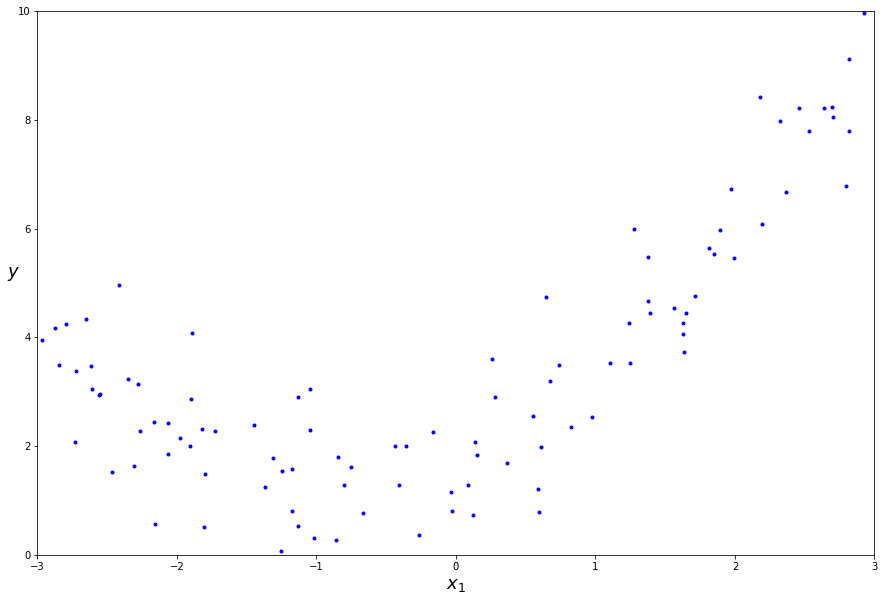

In [36]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1 )#100 rows , 1 column
plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()


**Result:** as you can see in that plot, the data is ploted in way which **linear regresion** can't fit properly, we can use **Polynomial regression** that uses linear model to fit **nonlinear data**. 

The equivalent code using **Scikit-learn** will be as per the following:

In [37]:
from sklearn.preprocessing import PolynomialFeatures
#use PolynomialFeatures function to generate new feature matrix without bias
#consisting of all polynomial combinations of the features up to the given degree(power of feature), 
#in our code we have 2 features x and y
#default degree = 2 quadratic regression [x,x^2] , in case degree = 3 means cubic [x,x^2,x^3]... 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#use fit_transform : is used for the initial fitting of parameters on the training set x, 
#but it also returns a transformed x′ = (x-mean)/sd that centered the training data 
# it just calls first fit() and then transform() on the same data.
X_poly = poly_features.fit_transform(X) 
#check first value in x feature and compare it with X_pol
X[0]


array([-0.75275929])

In [40]:
#X_pol contain the original feature of x plus the x^2(2nd-degree polynomial)
#-0.75275929 is first value x feature and 0.56664654 is value of x^2  
X_poly[0]

array([-0.75275929,  0.56664654])

In [41]:
#using linear regression to create a modeel that fit nonlinear data 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

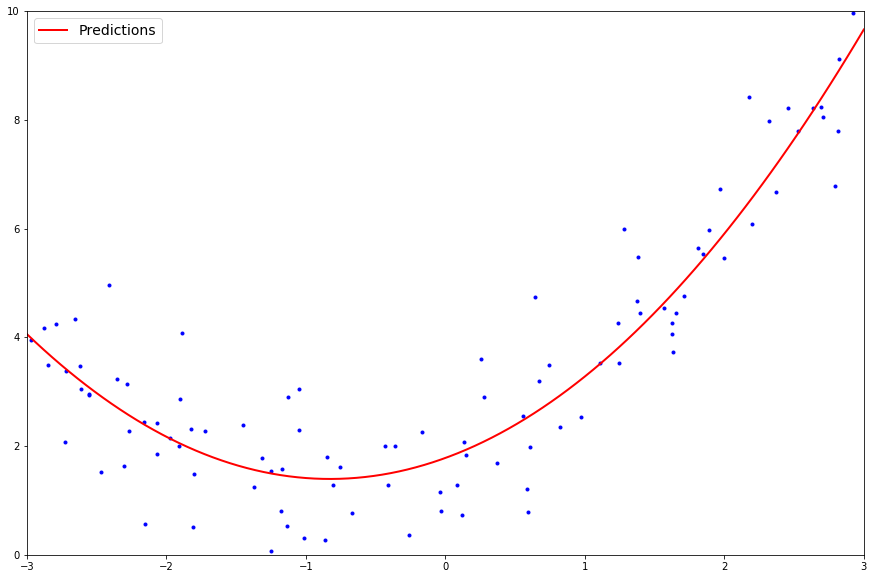

In [42]:
#generate an array of random values btw [-3,3] with 100 rows and 1 column 
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
#returns a original feature of X_new plus transformed X_new′ = (X_new - mean)/sd that centered the training data 
X_new_poly = poly_features.transform(X_new)
#return predicted y, given X_new_poly observations
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

**Comparasion:** when there are *multiple features*, **Polynomial Regression** is capable of finding relationships between features, unlike **linear Regression**.

<br>

**But how can we really know that?**

# Learning Curves

Using **high degree Polynomial Regression** will maybe fit the training data much better than **Linear Regression**
the below plot shows the comparasion between **300-degree polynomial model** with **linear** and **quadratic** models 

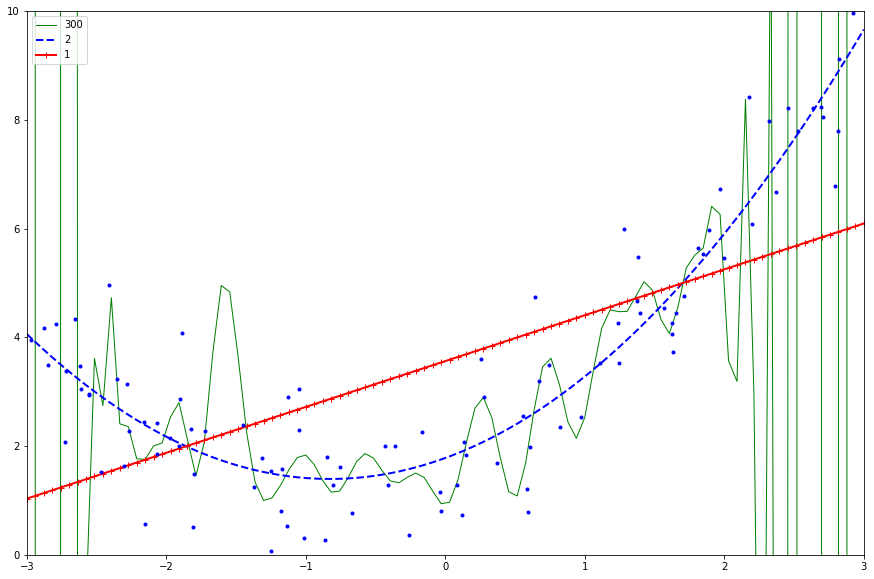

In [43]:
#StandardScaler: Standardize features by removing the mean and scaling to unit variance similar to MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Pipeline: pipeline of transforms with a final estimator,
#to assemble several steps that can be cross-validated together 
#while setting different parameters
from sklearn.pipeline import Pipeline

plt.figure(figsize=(15,10))
#style : color , width: size of the curve/line , degree: quadratic or linear or 300! :)
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    #generate new feature matrix without bias given the degree
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    #standardize features , mean=0 , sd=1
    std_scaler = StandardScaler()
    ##using linear regression to create a modeel that fit nonlinear data 
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    #calling the function for fitting the polynomial model
    #X = 6 * np.random.rand(m, 1) - 3
    #y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    polynomial_regression.fit(X, y)
    #predict with test data X_new array 
    #X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    y_newbig = polynomial_regression.predict(X_new)
    #plot X_new feature against predicted feature
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

Restult: 
- **Polynomial Regression** model*(green curve)* is **overfitting** the training data while the **linear model**(*red dashed line*) **underfitting** it
- **Quadratic model** *(blue dashed curve)* will generalize best in this case



**Q5: How can you tell that your model is simple or complex?,and if model is overfitting or underfitting the data?
**
- By using **Cross-Validation** to estimate the model's generalization performance
   
   **- Overfitting:** when the model performs well on training data and gerneralizes poorly according to CV metrics *(too complex model)*
   
   **- Underfitting:** when the model both perfoms and generalizes poorly *(too simple model)*


- Or by looking at **learining curves** and compare the plots of the model's performance on training and validation sets, by looking to the below learning curves **(red,blue)** of **Linear Regression** model:
     
     **- The training curve(red)** starts at **0** which means model can fit perfectly with **1** or **2 instances** in training set, and adding **3rd instance** will not help to get a better fitted model as the data is **nonlinear** with **noise**, and will not make **RMSE** better or worse, so better to use more **complex model** or better features
     
     **- The validation curve(blue)** has big **RMSE** and starts to go down when the model learn more training instances 
     
     **- Both curves** are example of **underfitting model**

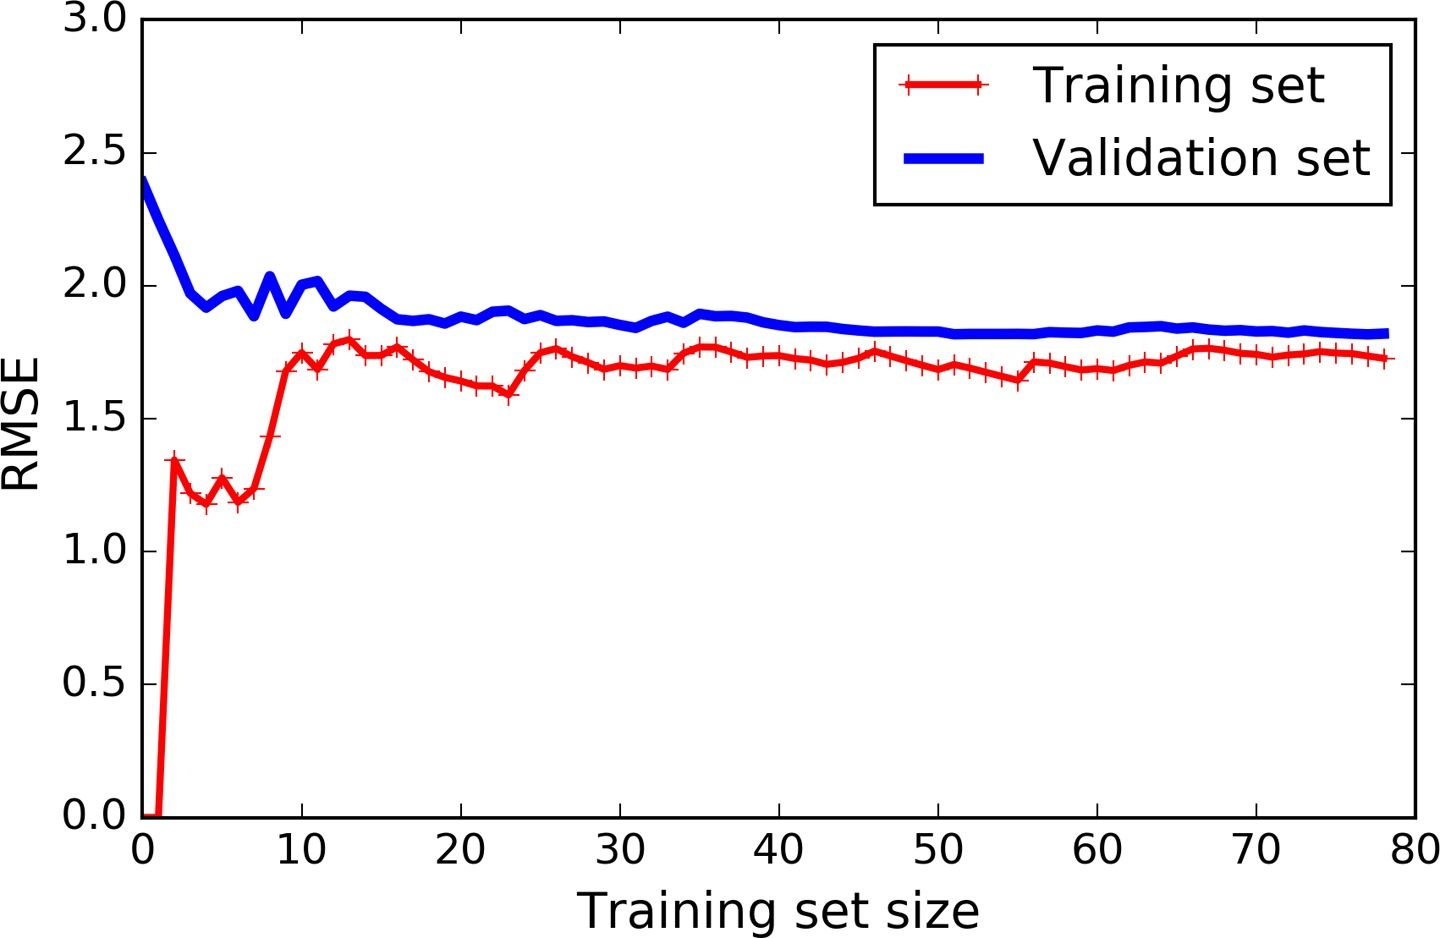

In [31]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LC.png')

<br>

The below figure indicates the learning curves of **10-degree** **Polynomial model** on same data and it looks a bit like **Linear Regression model**

**Polynomial model** VS **Linear Regression**:
 - **Error** (reduced to around 1) on trainig data is much lower than Error (reduced to around 1.8) with **Linear Regression** model
 - **Gab** between curves, which means model perform better on training data than on validation one => **overfitting model**, while its **underfitting** with **Linear Regression** model
 - Learning curves of **Polynomial model** continue to get closer in case large training data used

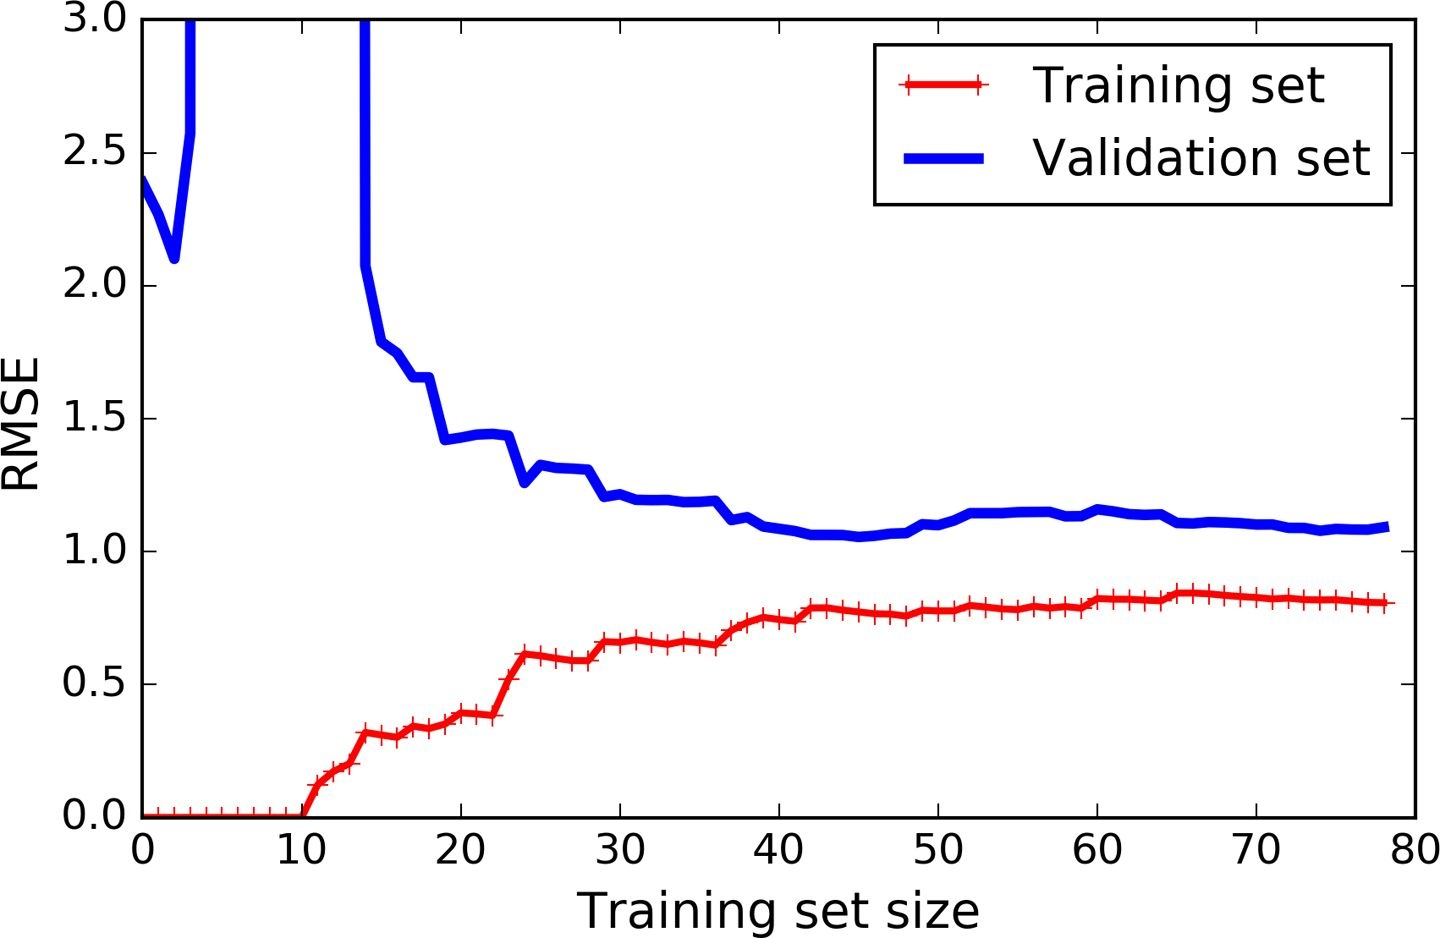

In [32]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LC_Poly.png')

<br>

<br>

**how can we reduce the chance of overfitting? **

# Regularized Linear Models

- Regularize Linear model is a good way to **reduce overfitting**.

- the fewer *degree of freedom* it has, the harder will be to **overfit** the data

- regularize Polynomial model require **reduce in number of Polynomial degrees**

- regulaize Linear Model achieved by **constraining the weight** of the model

- **3** different ways to constrain the **weights**:
    
    **- Ridge Regression**
    
    **- Lasso Regression**
    
    **- Elastic Net **

## Ridge Regression 

- Is Regularized version of **Linear Regression**

- **Regularization term which added to the cost function during training  = **


    - Where $θ$ is vector of *feature weight* and $α$ hyperparameter is to control regularize the model
    
        - If $α$ = 0 => **Ridge Regression is Linear Regression** 
        
        - If $α$ VERY large => all **weights** end up very close to 0 and flat line cross the data's mean
   
    - **Learning algorithm** will **fit the data** and **keep the model weights as small as possible**
    
    - evaluate the model's performance using unregularized performance measure


- **Scale** your data before performing **Ridge Regression** 


- **Ridge Regression cost function equation:**
    
    - $θ0$ or bias ,is not regularized (starts with **i =1**, not **0**)
    
    - **Weight vector** w = $θ1$ to $θn$, w can be defined as the vector of feature weights then 
      the Regularization term = $1⁄2(∥ w ∥2)^2$ , where $∥ w ∥2$ is norm of the weight vector w
      
    - It uses the **squared euclidean **$l2$** of the weight vector**  

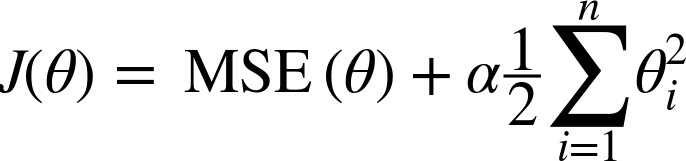

In [33]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/RR.png')

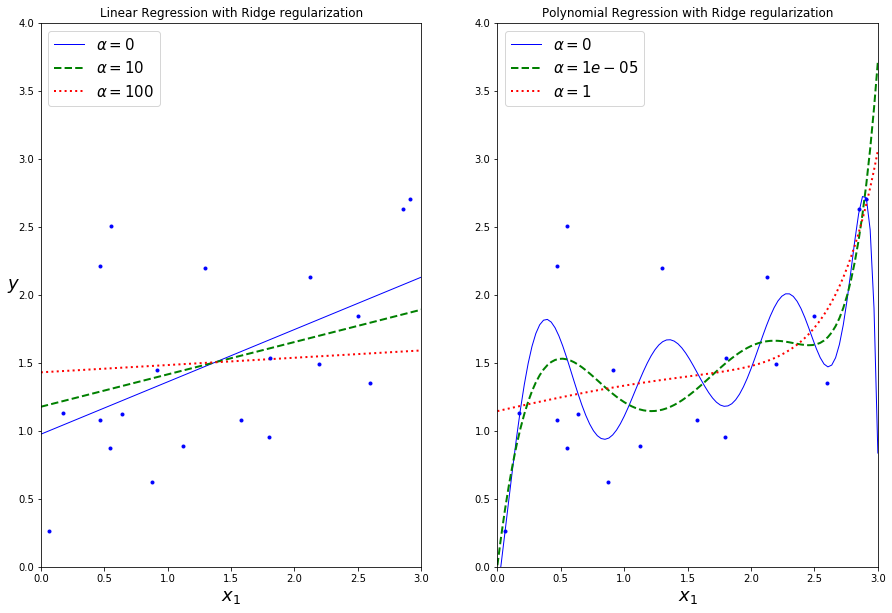

In [44]:
from sklearn.linear_model import Ridge

np.random.seed(42)
#number of observation 
m = 20
# generate training data
X = 3 * np.random.rand(m, 1)
# random initialization
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# generate an test array of random values btw [0,3] with 100 rows and 1 column 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

#function that takes 4 parameters 
# - model_calss = Ridge                        - polynomial = true or false
# - alphas = control regularize the model      - model_kargs = random_state 42 to get the same output every split
#                                              - ** keyword argument unpacking data structure

def plot_model(model_class, polynomial, alphas, **model_kargs):
    # blue , green and red colors for alpha curves 
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #create the model , if alpha = 0 then its linear Regression 
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        # Polymnomial Regression
        if polynomial:
            #Pipeline: pipeline of transforms with a final estimator
            model = Pipeline([
                    #degree(power of feature, i.e x ^ 10), no bias/X0 
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        #fitting the model
        model.fit(X, y)
        #apply model with test data X_new - prediction
        y_new_regul = model.predict(X_new)
        #line width = 2 for Polynomial , and =1 for Linear Regression
        lw = 2 if alpha > 0 else 1
        #plot the test data against y-hat
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Linear Regression with Ridge regularization")
#calling the function -  Linear Regression 
#alpha values = 0, 10 , 100 
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plt.title("Polynomial Regression with Ridge regularization")
# calling the funtion - Polynomial Regression  
# alpha values = 0 , 0.00001 , 1 
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

#or use Ridge module from Scikit-Learn using closed-form solution
#from sklearn.linear_model import Ridge
#ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
#ridge_reg.fit(X, y)
#ridge_reg.predict([[1.5]])

#sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
#sgd_reg.fit(X, y.ravel())
#sgd_reg.predict([[1.5]])

#ridge_regridge_re  = Ridge(alpha=1, solver="sag", random_state=42)
#ridge_reg.fit(X, y)
#ridge_reg.predict([[1.5]])

- On the right, **The more increasing alpha in Polynomial Regression with Ridge regularization leads to flatter predictions**


- On the left, With **Linear Regression leading to linear predictions.**

<br>

## Lasso Regression 

- It is a regularized version of **Linear Regression**, it adds a regularization term to the cost function just like **Ridge Regression**, but it uses **$l1$** absolute norm of the weight vector instead of **$l2$** 

- **Lasso Regression cost function:**

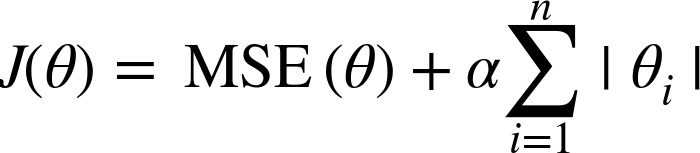

In [35]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LAS.png')

Replace Ridge model with Lasso model and uses smaller $α$ values by calling **plot_model** function and pass *Lasso* as model_class parameter:

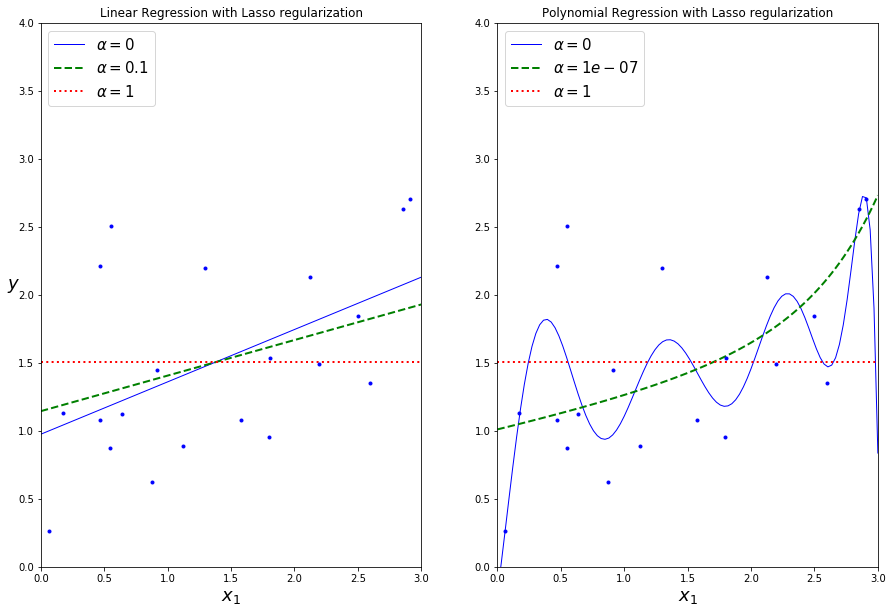

In [48]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Linear Regression with Lasso regularization")
#calling the function -  Linear Regression 
#alpha values = 0, 0.1 , 1 
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plt.title("Polynomial Regression with Lasso regularization")
# calling the funtion - Polynomial Regression  
# alpha values = 0 , 0.00000001 , 1
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
#save_fig("lasso_regression_plot")
plt.show()

Result:

- **Lasso Regression** eliminate the weights of the least important features (i.e set them to 0)

**Q6: Why the Polynomial model with $α$ = $0.00000001$ (green dashed line) looks *quadratic*, almost *linear*?**

Becouse **Lasso Regression** performs feature selection and outputs a **spare model** with *few nonzero feature weights* since all the weights of high-degree are set to 0

<br>

**How can we find a solution in the middle**?

## Elastic Net

- It's regularization term is simple mix of both **Ridge regularization terms** and **Lasso regularization terms** by controling the *mix ratio* $r$
    - **$r = 0$**, Elstic Net = Ridge Regression 
    
    - **$r = 1$**, Elstic Net = Lasso Regression


- The equation of Elastic Net cost function:

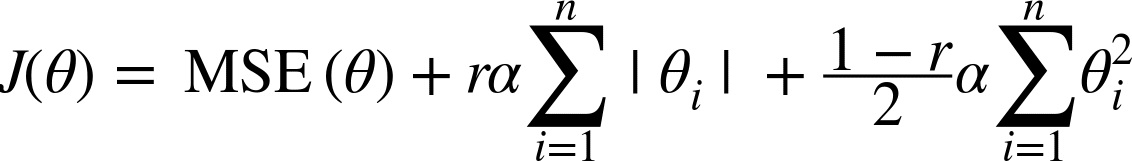

In [38]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/EN.png')

**confused !!**

**Q7: When should you use Linear Regression, Ridge, Lasso or Elastic Net?**

- Generally you should *avoid* plain **Linear Regression** 


- **Ridge** is *good default* but keep in you mind that Ridge use all features that might some of these features be **useful** and other might be **useless**!


- **Lasso** *reduce* these **useless** features weights down to 0 but Lasso may behave erratically when 
    
    - Number of features > number of training instances 
    
    - Several features are strongly correlated
    
- **Elastic Net** is same as Lasso, reduce the useless features weights down to zero, **but preferred over Lasso**  

**The simple implementation of Lasso, Ridge and Elastic Net as per the following code:**

In [47]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso = lasso_reg.predict([[1.5]])


from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge = ridge_reg.predict([[1.5]])

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elestic_net = elastic_net.predict([[1.5]])

print(" lasso _reg : ", lasso," \n","ridge _reg : ", ridge, " \n","elestic_net : ", elestic_net)

 lasso _reg :  [1.53788174]  
 ridge _reg :  [[1.55325833]]  
 elestic_net :  [1.54333232]


<br>